<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab9/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №9 по вычислительной математике

Державин Андрей, Б01-909

## Задача XI.9.5

Для численного отыскания периодического с периодом $1$ решения уравнения
$$
y'' - P^2(x)y = f(x), \: x\in \left[ 0, 1 \right]
$$
где
$$
P^2(x) =  10 + \sin{2\pi x}, \:\:\:
f(x) = \cos{2\pi x}, \:\:\:
h = 0.005, \: \: Nh = 1
$$
используется разностная схема
$$
\left\lbrace
\begin{matrix}
\dfrac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 &=& f(0)& \\
\dfrac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n &=& f(nh)&, \: n = 1,2, \dots, N-2 \\
\dfrac{y_0 - 2y_{N-1} + y_{N-2}}{h^2} - P^2(1-h)y_{N-1} &=& f(1-h)& \\
\end{matrix}
\right.
$$
где $y_0 = y_N$


### Описание метода

Перепишем систему:
$$
\left\lbrace
\begin{matrix}
y_1 - 2y_0 + y_{N-1} - P^2(0)y_0h^2 &=& f(0)h^2& \\
y_{n+1} - 2y_n + y_{n-1} - P^2(nh)y_nh^2 &=& f(nh)h^2&, \: n = 1,2, \dots, N-2 \\
y_0 - 2y_{N-1} + y_{N-2} - P^2(1-h)y_{N-1}h^2 &=& f(1-h)h^2& \\
\end{matrix}
\right. \Leftrightarrow
$$
$$
\left\lbrace
\begin{matrix}
y_{N-1} - \left(2 + P^2(0)h^2\right)y_0 + y_{1} &=& f(0)h^2& \\
y_{n-1} - \left(2 + P^2(nh)h^2\right)y_n + y_{n+1} &=& f(nh)h^2&, \: n = 1,2, \dots, N-2 \\
y_{N-2} - \left(2 + P^2(1-h)h^2\right)y_{N-1} + y_0 &=& f(1-h)h^2& \\
\end{matrix}
\right. \Leftrightarrow
$$
Введём обозначения
$$
b_k = 2 + P^2(kh)h^2, \:
\varphi_k = f_kh^2
$$
Тогда система запишется в виде
$$
\left\lbrace
\begin{matrix}
y_{N-1} - b_0y_0 + y_{1} &=& \varphi_0& \\
y_{n-1} - b_ny_n + y_{n+1} &=& \varphi_n&, \: n = 1,2, \dots, N-2 \\
y_{N-2} - b_{N-1}y_{N-1} + y_0 &=& \varphi_{N-1}& \\
\end{matrix}
\right.
$$
Из первого уравнения получаем для $y_0$:
$$
y_0 = \dfrac{1}{b_0} y_1 - \dfrac{\varphi_0}{b_0} + \dfrac{1}{b_0}y_{N-1}
⇔
\left[
\begin{matrix}
\alpha_1 = \dfrac{1}{b_0}\\
\beta_1 = - \dfrac{\varphi_0}{b_0} \\
\gamma_1 = \dfrac{1}{b_0} 
\end{matrix}
\right] \Leftrightarrow
y_0 = \alpha_1 y_1 + \beta_1 + \gamma_1y_{N-1}
$$
Из второго уравнения получаем для $y_{n-1}$:
$$
y_{n-1} = b_ny_n + \varphi_n - y_{n+1}
$$
$\sphericalangle n = N - 2$:

$$
y_{N-3} = b_{N-2}y_{N-2} + \varphi_{N-2} - y_{N-1}
$$
Подставим $y_{N-2} - b_{N-1}y_{N-1} + y_0 = \varphi_{N-1}$:
$$
y_{N-3} = b_{N-2}y_{N-2} + \varphi_{N-2} - \left(
  \dfrac{1}{b_{N-1}} y_{N-2} - \dfrac{\varphi_{N-1}}{b_{N-1}} +  
  \dfrac{1}{b_{N-1}} y_0 
\right) = \left(b_{N-2} - \dfrac{1}{b_{N-1}} \right)y_{N-2} 
+ \varphi_{N-2} - \dfrac{\varphi_{N-1}}{b_{N-1}} + \dfrac{1}{b_{N-1}} y_0 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

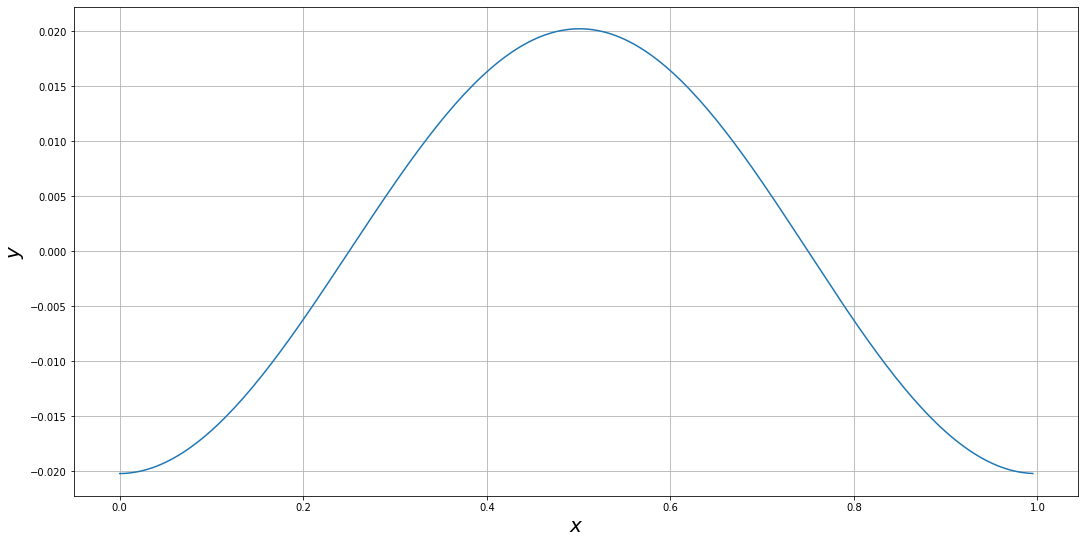

In [19]:
h = 0.005
N =  int(1 / h)
x = np.array([k * h for k in range(N)])
b = -(2 + h**2 * (10 + np.sin(2 * np.pi * x)))
phi = h**2 * np.cos(2 * np.pi * x)

mat = np.diag(b) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)
mat[0][-1] = mat[-1][0] = 1

y = np.linalg.solve(mat, phi)

plt.figure(figsize=(18, 9))
plt.plot(x, y)
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.grid()